In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.risks as risks
import mlgrad.gd as gd
import mlgrad.inventory as inventory

In [3]:
df = pd.read_csv("data/animals.csv", sep=",")
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [4]:
X = np.log(df.body.values)
Y = np.log(df.brain.values)
Xs = X.reshape(-1,1)

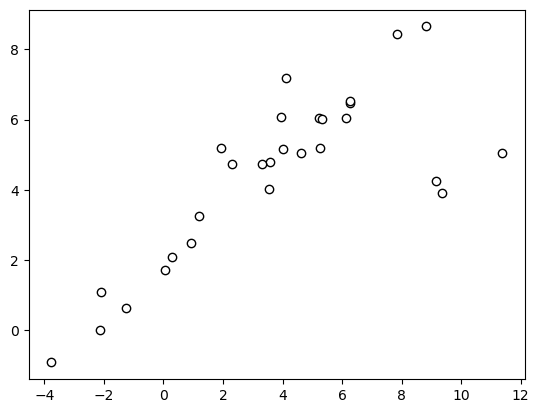

In [5]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.show()

In [6]:
loss_func = loss.ErrorLoss(funcs.Square())
linmod = models.LinearModel(1)
linmod.init_param()
risk_func = risks.ERisk(Xs, Y, linmod, loss_func)
alg = gd.FG(risk_func, h=0.1)
alg.fit()

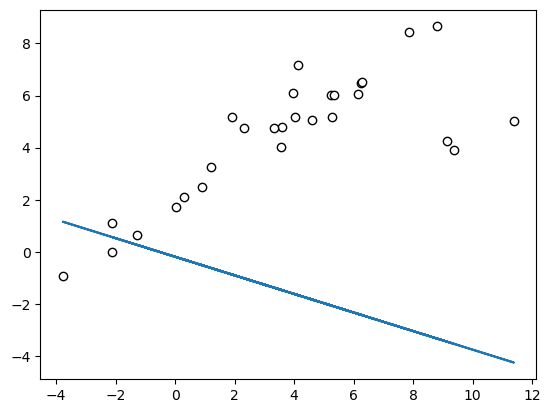

In [7]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate_all(Xs))
plt.show()

In [8]:
import mlgrad.regr as regr

In [9]:
#linmod.init_param()
linmod1 = models.LinearModel(1)
alg2 = regr.regression(Xs, Y, linmod, loss_func, h=0.1)

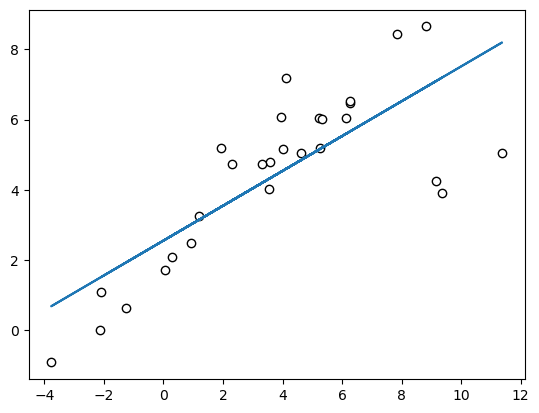

In [10]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate_all(Xs))
plt.show()

In [11]:
E = abs(Y - linmod.evaluate_all(X[:,None]))

In [12]:
import mlgrad.plots as plots

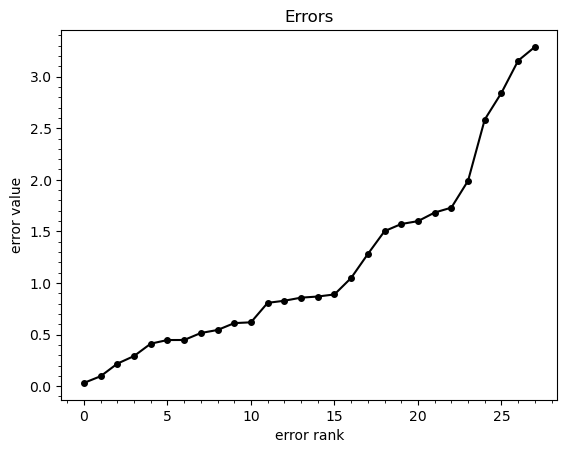

In [13]:
plots.plot_errors(linmod, X[:,None], Y)
plt.show()

In [14]:
Z = inventory.zscore(E)

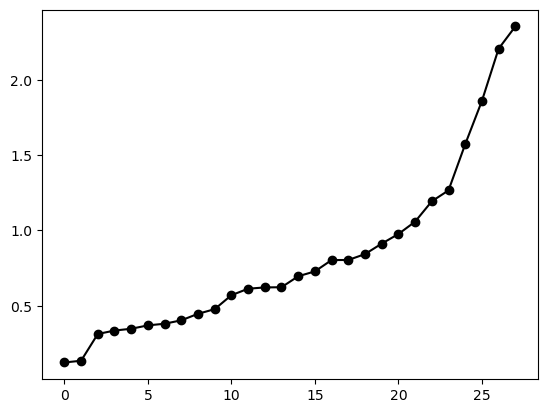

In [15]:
plt.plot(sorted(abs(Z)), marker='o', color='k')
plt.show()

In [16]:
Zm = inventory.modified_zscore(E)

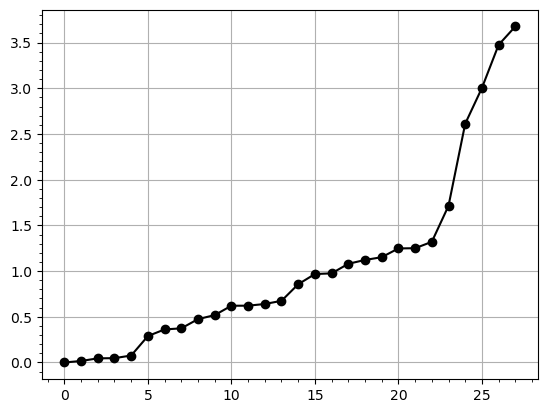

In [17]:
plt.plot(sorted(abs(Zm)), marker='o', color='k')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [18]:
X1 = X[Zm < 3]
Y1 = Y[Zm < 3]

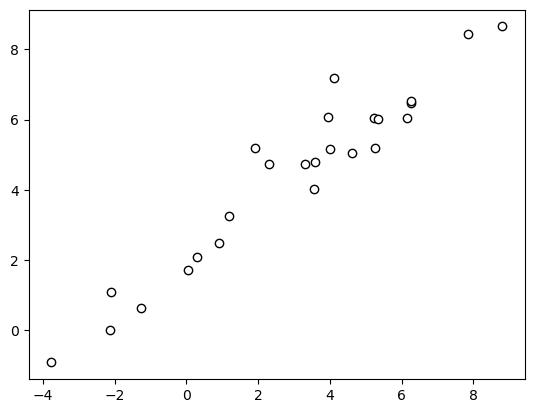

In [19]:
plt.scatter(X1, Y1, c="w", edgecolors="k")
plt.show()

In [20]:
linmod2 = models.LinearModel(1)
alg2 = regr.regression(X1[:,None], Y1, linmod2, loss_func, h=0.1)
E2 = abs(Y1 - linmod2.evaluate_all(X1[:,None]))
Z2 = inventory.modified_zscore(E2)

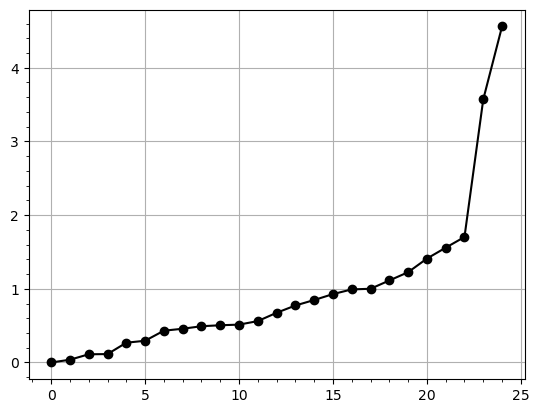

In [21]:
plt.plot(sorted(abs(Z2)), marker='o', color='k')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [22]:
X2 = X1[Z2 < 3]
Y2 = Y1[Z2 < 3]

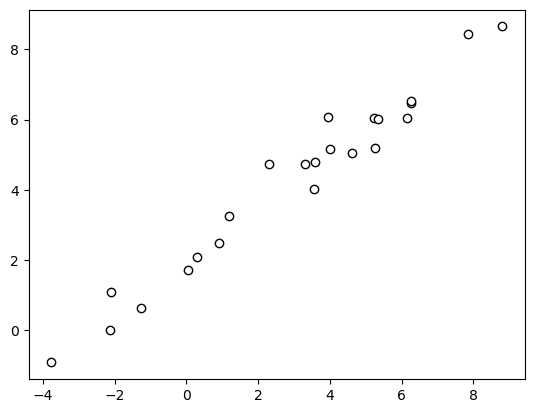

In [23]:
plt.scatter(X2, Y2, c="w", edgecolors="k")
plt.show()

In [24]:
linmod3 = models.LinearModel(1)
alg3 = regr.regression(X2[:,None], Y2, linmod3, loss_func, h=0.1)
E3 = abs(Y2 - linmod3.evaluate_all(X2[:,None]))
Z3 = inventory.modified_zscore(E3)

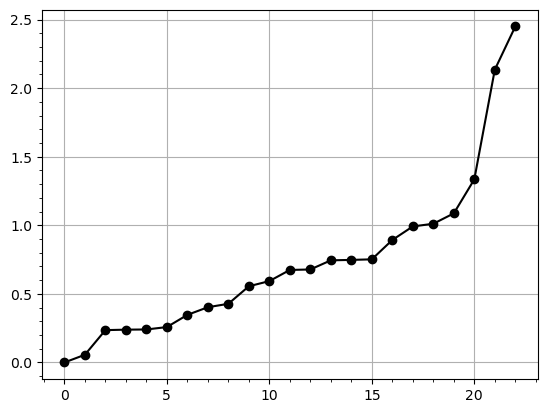

In [25]:
plt.plot(sorted(abs(Z3)), marker='o', color='k')
plt.grid(1)
plt.minorticks_on()
plt.show()

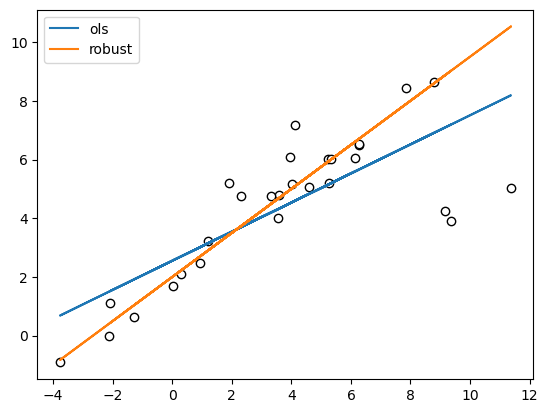

In [26]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate_all(Xs), label='ols')
plt.plot(X, linmod3.evaluate_all(Xs), label='robust')
plt.legend()
plt.show()

In [27]:
EE = abs(Y - linmod3.evaluate_all(Xs))
ZZ = inventory.modified_zscore(EE)

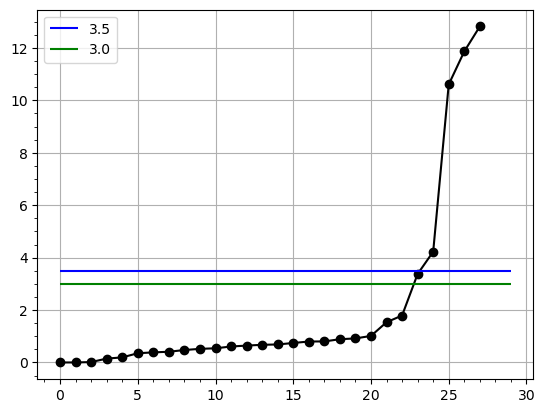

In [31]:
plt.plot(sorted(abs(ZZ)), marker='o', color='k')
plt.hlines(3.5, 0, 29, label="3.5", color='b')
plt.hlines(3.0, 0, 29, label="3.0", color='g')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()